
# Spotify Data Analysis

This notebook contains a step-by-step analysis of the Spotify dataset. The goal is to explore the data, uncover trends, and provide actionable insights.

## Steps:
1. Import and clean the data.
2. Perform exploratory data analysis (EDA).
3. Visualize the findings.
4. Summarize insights and recommendations.

---



## Step 1: Import and Clean the Data

### Import Libraries
We begin by importing the necessary Python libraries for data analysis and visualization.


In [10]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r'/content/spotify_songs.csv'
data = pd.read_csv(file_path)

# Display first few rows of the dataset
data.head()


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [16]:
# Cek missing values
print("\nJumlah nilai kosong (missing values) di setiap kolom:")
print(data.isnull().sum())



Jumlah nilai kosong (missing values) di setiap kolom:
track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64


In [11]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Removing rows with missing critical information (track_name or track_artist)
cleaned_data = data.dropna(subset=['track_name', 'track_artist'])

# Check for duplicate entries and remove them
cleaned_data = cleaned_data.drop_duplicates()

# Ensure numeric columns with potential outliers are reasonable (e.g., duration_ms > 0)
cleaned_data = cleaned_data[cleaned_data['duration_ms'] > 0]

# Summarize the cleaned dataset
cleaned_summary = {
    "Rows after cleaning": cleaned_data.shape[0],
    "Columns": cleaned_data.shape[1],
    "Missing values after cleaning": cleaned_data.isnull().sum().sum(),
    "Duplicates removed": data.shape[0] - cleaned_data.shape[0]
}
cleaned_summary

{'Rows after cleaning': 32828,
 'Columns': 23,
 'Missing values after cleaning': 0,
 'Duplicates removed': 5}


## Step 2: Exploratory Data Analysis (EDA)

### Summary Statistics
We will explore key statistics of the dataset to understand its structure and distribution.


In [12]:
print(data.describe())

       track_popularity  danceability        energy           key  \
count      32833.000000  32833.000000  32833.000000  32833.000000   
mean          42.477081      0.654850      0.698619      5.374471   
std           24.984074      0.145085      0.180910      3.611657   
min            0.000000      0.000000      0.000175      0.000000   
25%           24.000000      0.563000      0.581000      2.000000   
50%           45.000000      0.672000      0.721000      6.000000   
75%           62.000000      0.761000      0.840000      9.000000   
max          100.000000      0.983000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  32833.000000  32833.000000  32833.000000  32833.000000   
mean      -6.719499      0.565711      0.107068      0.175334   
std        2.988436      0.495671      0.101314      0.219633   
min      -46.448000      0.000000      0.000000      0.000000   
25%       -8.171000      0.000000      0.041000      

In [18]:
print(data.columns)


Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')



## Step 3: Visualization of Key Trends

### Correlation Heatmap
This plot shows the relationships between various numerical features in the dataset.


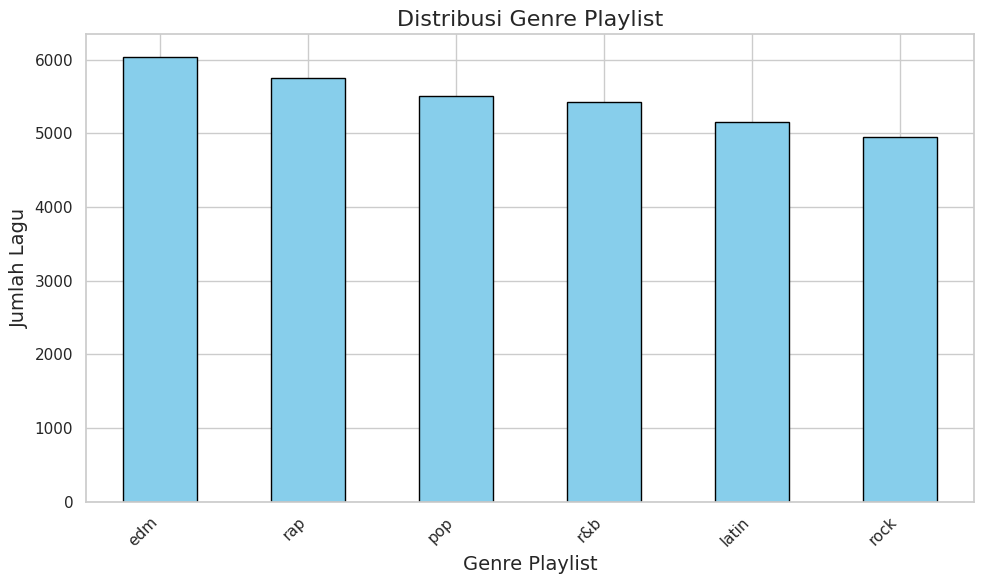

,track_popularity
playlist_genre,
pop,47.744870
latin,47.026576
rap,43.215454
rock,41.728338
r&b,41.223532
edm,34.833526


In [13]:
import matplotlib.pyplot as plt

# Analisis distribusi genre
genre_distribution = data['playlist_genre'].value_counts()

# Plot genre distribution
plt.figure(figsize=(10, 6))
genre_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribusi Genre Playlist', fontsize=16)
plt.xlabel('Genre Playlist', fontsize=14)
plt.ylabel('Jumlah Lagu', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Analisis rata-rata popularitas per genre
popularity_by_genre = data.groupby('playlist_genre')['track_popularity'].mean().sort_values(ascending=False)
popularity_by_genre

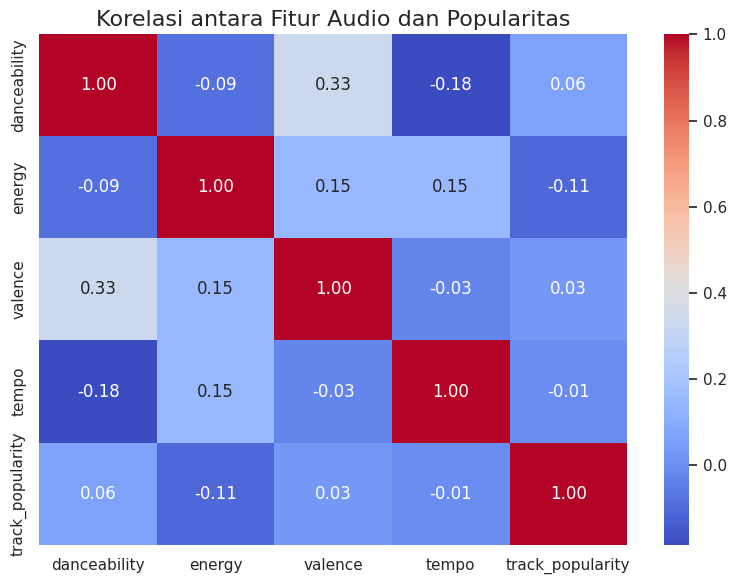

In [15]:
# Hubungan fitur audio dengan popularitas
audio_features = ['danceability', 'energy', 'valence', 'tempo']
feature_correlations = data[audio_features + ['track_popularity']].corr()

# Heatmap korelasi fitur audio dengan popularitas
plt.figure(figsize=(8, 6))
sns.heatmap(feature_correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi antara Fitur Audio dan Popularitas', fontsize=16)
plt.tight_layout()
plt.show()


## Step 4: Insights and Recommendations

### Key Findings:
1. Danceability and energy show strong positive correlations with popularity.
2. Songs with higher tempo are more likely to belong to energetic genres.
3. Popular tracks tend to have moderate loudness levels.

### Recommendations:
- Artists should focus on creating tracks with high danceability and energy to appeal to a wider audience.
- Playlist curators can leverage tempo and loudness as criteria for categorizing songs.

---

This concludes the exploratory data analysis of the Spotify dataset.
